<a href="https://colab.research.google.com/github/setyawan1234/PCVK_GENAP_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow 
import numpy as np
from matplotlib import pyplot as plt

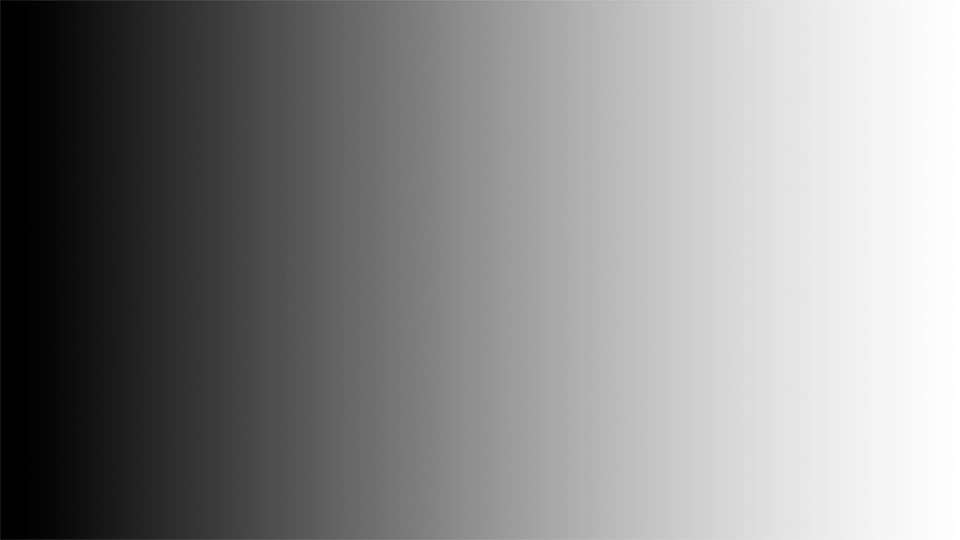

In [ ]:
# gambar gradient dibaca menggunakan cv.imread dari direktori /PCVK/week10/gradient.jpg dan ditampilkan dengan menggunakan cv2_imshow.
input_image = cv.imread('/content/drive/MyDrive/PCVK/week10/gradient.jpg')
cv2_imshow(input_image)
# Output image

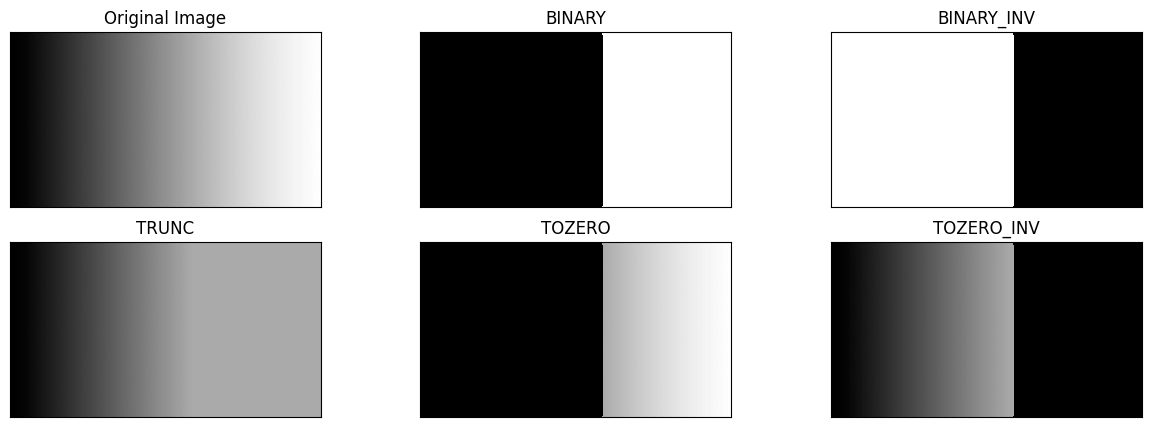

In [ ]:
# gambar asli disalin ke lima variabel berbeda yaitu thresh1, thresh2, thresh3, thresh4, dan thresh5 untuk diubah nilainya sesuai dengan jenis thresholding yang akan dilakukan.
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Threshold
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold = piksel yang lebih besar dari threshold diubah menjadi 255, sedangkan yang lebih kecil diubah menjadi 0
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold = piksel yang lebih besar dari threshold diubah menjadi 0, sedangkan yang lebih kecil diubah menjadi 255
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold = piksel yang lebih besar dari threshold diubah menjadi nilai threshold, sedangkan yang lebih kecil tetap sama
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero = piksel yang lebih besar dari threshold tetap sama, sedangkan yang lebih kecil diubah menjadi 0
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted = piksel yang lebih besar dari threshold diubah menjadi 0, sedangkan yang lebih kecil tetap sama
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

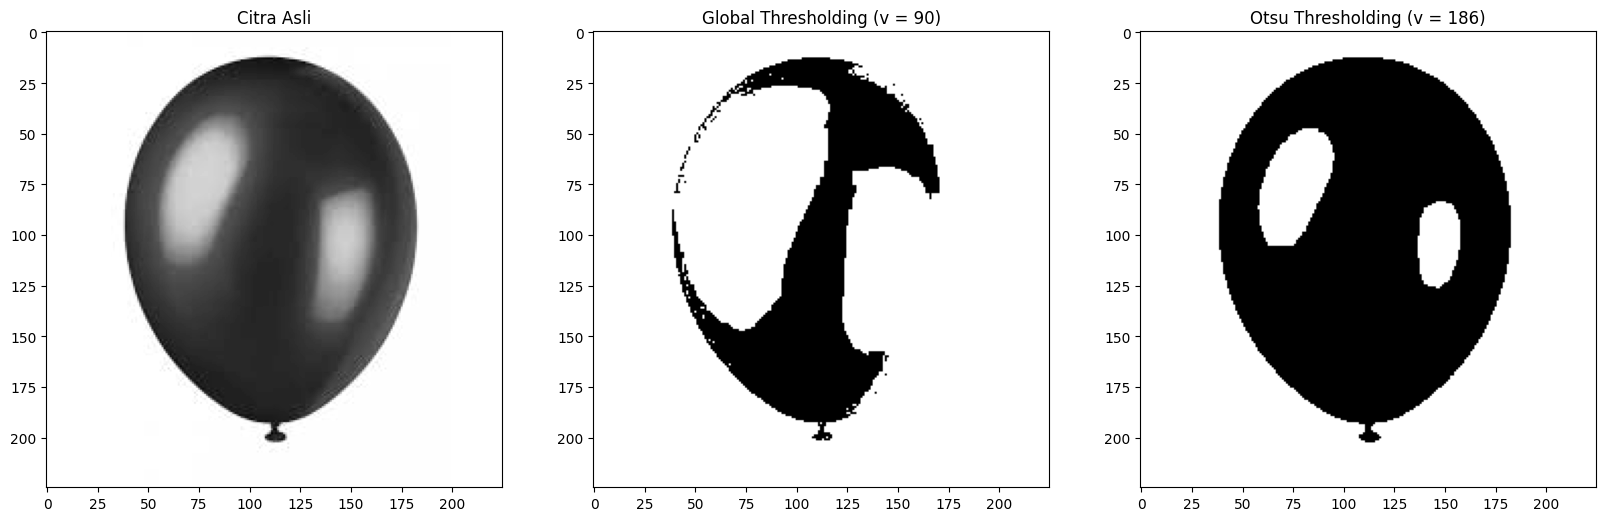

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/week10/ballon.jpg', 0)

# Hitung histrogram dan normalisasi
hist = cv.calcHist([img],[0],None,[256],[0,256])
hist_norm = hist.ravel()/np.max(hist)

# Inisialisasi variabel
best_thresh = 0  
best_var = 0

# Lakukan loop untuk setiap nilai threshold dari 0 hingga 255
for thresh in range(256):
    # Hitung jumlah piksel pada foreground dan background
    fore_pix = np.sum(hist_norm[:thresh])
    back_pix = np.sum(hist_norm[thresh:])
    
    # Hitung rata-rata intensitas piksel pada foreground dan background
    fore_mean = np.sum(np.arange(thresh)*hist_norm[:thresh])/fore_pix if fore_pix > 0 else 0   # jika fore_pix > 0 maka akan menghitung intesitas piksel pada foreground
    back_mean = np.sum(np.arange(thresh, 256)*hist_norm[thresh:])/back_pix if back_pix > 0 else 0 # jika back_pix > 0 maka akan menghitung intesitas piksel pada background
    
    # Hitung variansi antar kelas dan dalam kelas
    inter_var = fore_pix*back_pix*(fore_mean-back_mean)**2
    intra_var = np.sum((np.arange(thresh)-fore_mean)**2*hist_norm[:thresh])+np.sum((np.arange(thresh, 256)-back_mean)**2*hist_norm[thresh:])
    
    # Hitung total variansi
    total_var = inter_var/intra_var if intra_var > 0 else 0
    
    # Cari nilai threshold yang memaksimalkan variansi antar kelas
    if total_var > best_var:
        best_var = total_var
        best_thresh = thresh

# Thresholding gambar
ret, threshold1 = cv.threshold(img, 90, 255, cv.THRESH_BINARY)
img_thresh = np.zeros_like(img)
img_thresh[img >= best_thresh] = 255

titles = ['Citra Asli', 'Global Thresholding (v = 90)', 'Otsu Thresholding (v = 186)'] 
citra3 = [img, threshold1, img_thresh]
plt.figure(figsize = (15,5))

# Tampilkan gambar hasil thresholding
plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
plt.show()

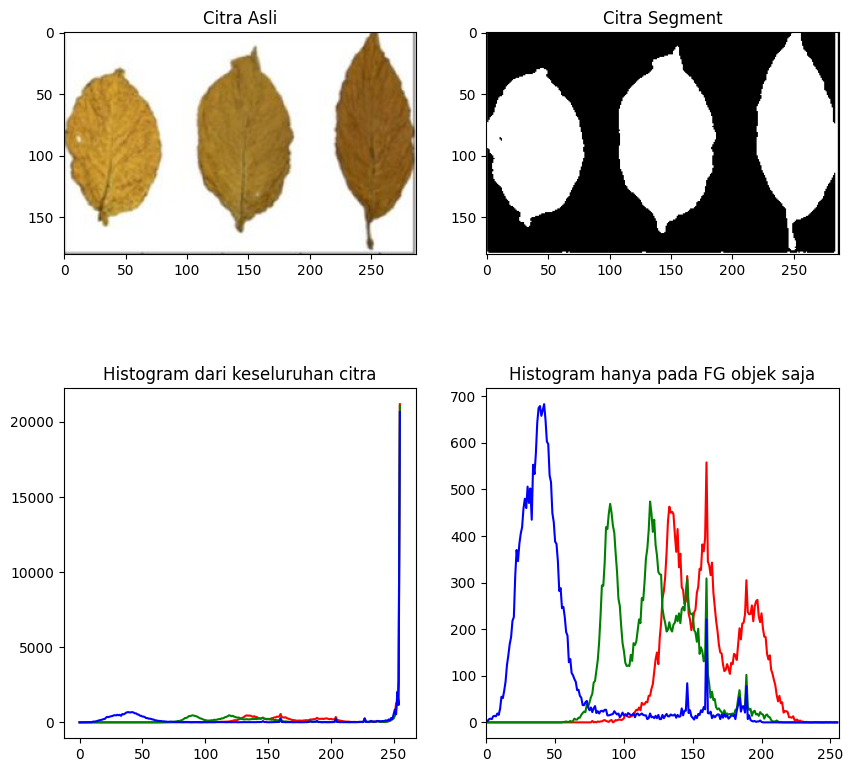

In [ ]:
# load the image in BGR format
img = cv.imread('/content/drive/MyDrive/PCVK/week10/tabacco.jpg')

# convert the image to RGB color space
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

# convert the image to grayscale
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# menerapkan thresholding ke gambar skala abu-abu untuk menyegmentasikan objek latar depan
# nilai ambang batas ditetapkan ke 200, piksel dengan nilai intensitas di atas 200 akan ditetapkan ke 255 (putih)
# piksel dengan nilai intensitas di bawah 200 akan ditetapkan ke 0 (hitam)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

# plot gambar asli dan gambar yang telah disegmentasi
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# memplot histogram warna seluruh gambar dan objek latar depan
color = ('r','g','b')
for i,col in enumerate(color):
    # menghitung histogram seluruh gambar untuk setiap saluran warna
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    
    # menghitung histogram objek latar depan untuk setiap saluran warna
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

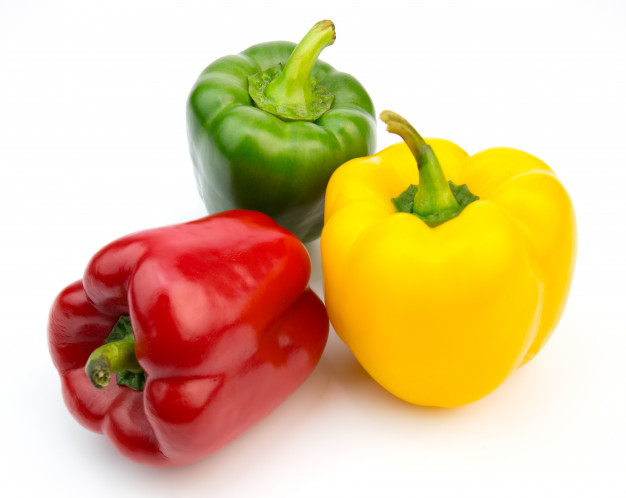

In [ ]:
img_peppers = cv.imread('/content/drive/MyDrive/PCVK/week10/peppers.jpg')
cv2_imshow(img_peppers)

Text(0.5, 1.0, 'Yellow Segmented Image')

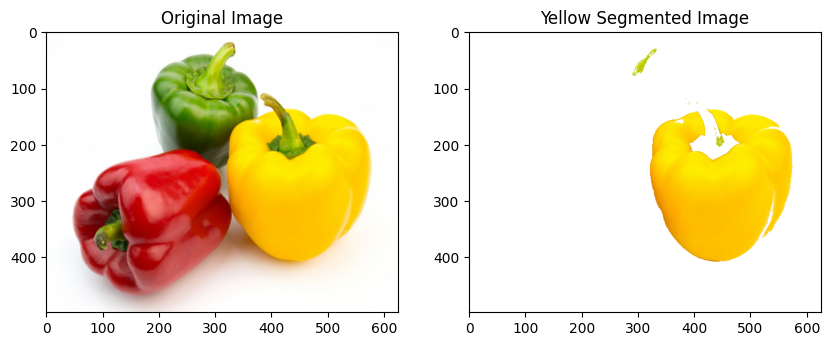

In [ ]:
# Konversi warna dari BGR ke RGB
img_rgb = cv.cvtColor(img_peppers, cv.COLOR_BGR2RGB)

# Konversi gambar ke tipe data float32 untuk K-Means
img_float = np.float32(img_rgb.reshape((-1, 3)))

# Definisikan parameter K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

# Menjalankan K-Means
ret, label, center = cv.kmeans(img_float, K, None, criteria, attempts, flags)

# Mengubah tipe data kembali ke uint8 dan reshape ke ukuran gambar asli
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# Mengambil piksel warna kuning saja
hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Menggabungkan mask dan gambar asli
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# Membuat background putih
background = np.zeros_like(result)
background.fill(255)

# Menambahkan gambar ke background putih
mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
result[mask_3d == 0] = background[mask_3d == 0]

# Menampilkan gambar
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')

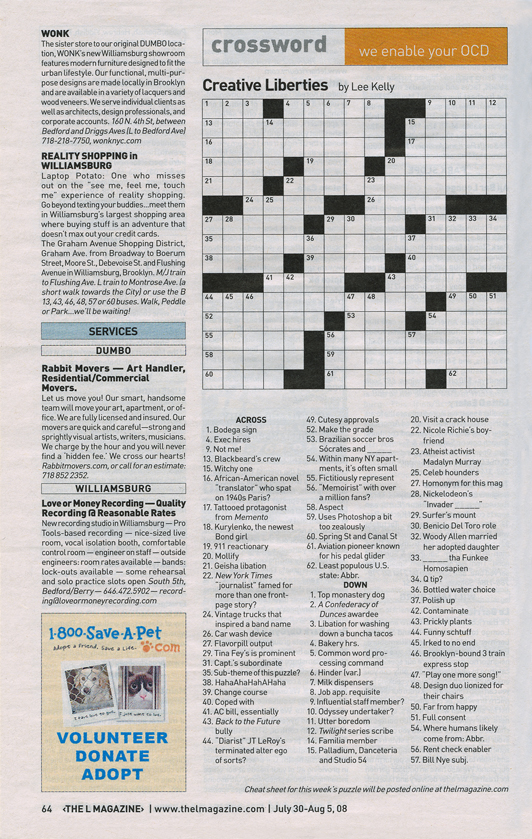

In [ ]:
img_crossword = cv.imread('/content/drive/MyDrive/PCVK/week10/crossword.jpg')
cv2_imshow(img_crossword)

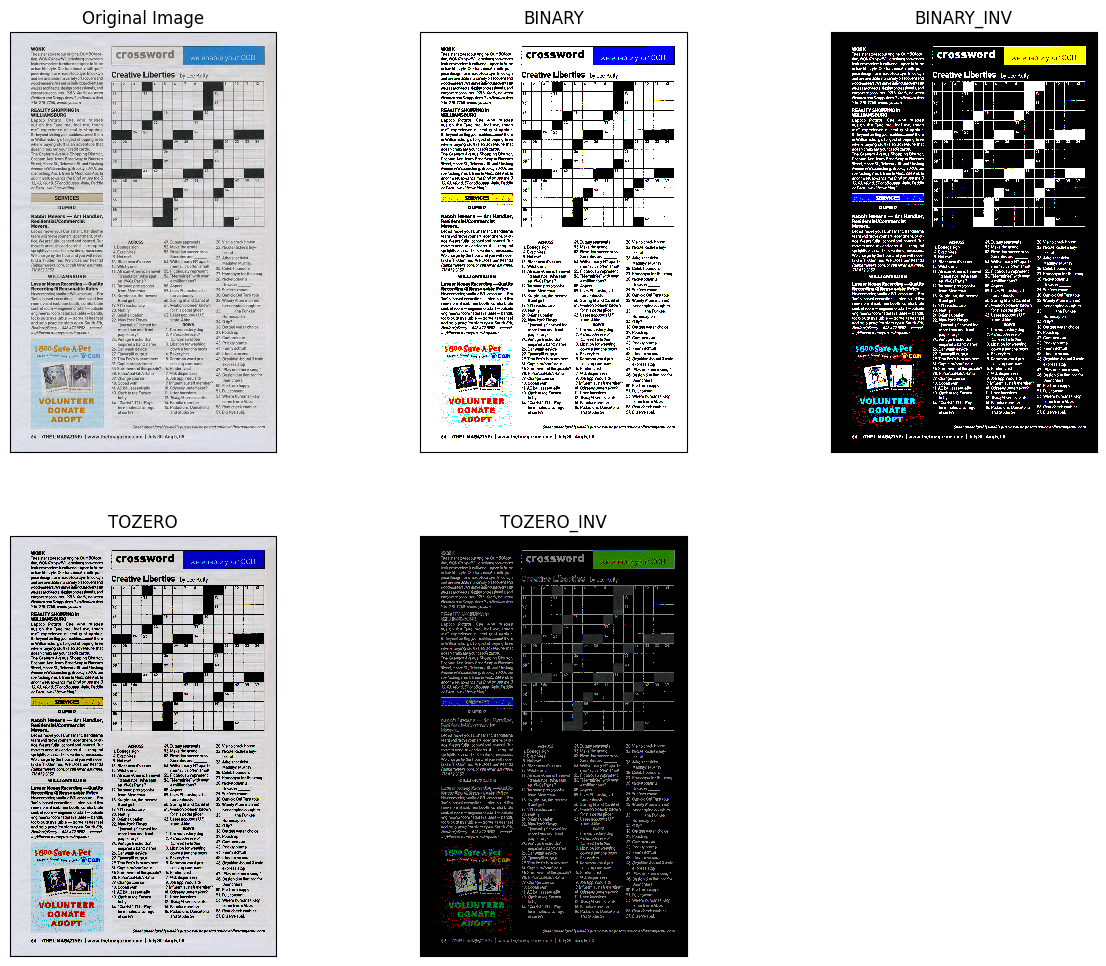

In [ ]:
# img_gray= cv.cvtColor(img_crossword, cv.COLOR_RGB2GRAY)
thresh = 168

ret, thresh1 = cv.threshold(img_crossword, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img_crossword, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img_crossword, thresh,255,cv.THRESH_TOZERO)
ret, thresh4 = cv.threshold(img_crossword, thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TOZERO', 'TOZERO_INV']
images = [img_crossword, thresh1, thresh2, thresh3, thresh4]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()